/home/riya/Desktop/Imageuploading/Cat Vs Dog Classifier/PetImages/Dog/0.jpg
/home/riya/Desktop/Imageuploading/Cat Vs Dog Classifier/PetImages/Dog/1.jpg
/home/riya/Desktop/Imageuploading/Cat Vs Dog Classifier/PetImages/Dog/2.jpg
/home/riya/Desktop/Imageuploading/Cat Vs Dog Classifier/PetImages/Dog/3.jpg
/home/riya/Desktop/Imageuploading/Cat Vs Dog Classifier/PetImages/Dog/4.jpg
/home/riya/Desktop/Imageuploading/Cat Vs Dog Classifier/PetImages/Dog/5.jpg
/home/riya/Desktop/Imageuploading/Cat Vs Dog Classifier/PetImages/Dog/6.jpg
/home/riya/Desktop/Imageuploading/Cat Vs Dog Classifier/PetImages/Dog/7.jpg
/home/riya/Desktop/Imageuploading/Cat Vs Dog Classifier/PetImages/Dog/8.jpg


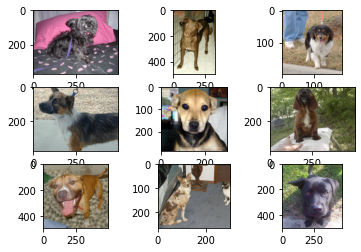

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder="/home/riya/Desktop/Imageuploading/Cat Vs Dog Classifier/PetImages/Dog"

for i in range(9):
    plt.subplot(3,3,i+1) #(nrows,ncolums,index=starts from 1)
    filename= folder + "/" + str(i) + ".jpg"
    print(filename)
    image=imread(filename) #reads an image from the file and converts it into an array
    plt.imshow(image) #Renders array into image
plt.show()

In [68]:
from PIL import Image
import numpy as np
from os import listdir,makedirs
from sklearn.model_selection import train_test_split
import shutil


root_dir="/home/riya/Desktop/Imageuploading/Cat Vs Dog Classifier/PetImages/"
cat_dir="/home/riya/Desktop/Imageuploading/Cat Vs Dog Classifier/PetImages/Cat/"
dog_dir="/home/riya/Desktop/Imageuploading/Cat Vs Dog Classifier/PetImages/Dog/"
classes=["Dog","Cat"]

for c in classes:
    makedirs(root_dir+"train/"+c)
    makedirs(root_dir+"test/"+c)

src_cat=cat_dir
src_dog=dog_dir

allfiles_cat=listdir(src_cat)
allfiles_dog=listdir(src_dog)

np.random.shuffle(allfiles_cat)
np.random.shuffle(allfiles_dog)

cat_train,cat_test=train_test_split(np.array(allfiles_cat),test_size=0.2,random_state=42)

cat_train=[src_cat+ name for name in cat_train.tolist()] #converts array into list 
cat_test=[src_cat+ name for name in cat_test.tolist()]

print("Training image is {}.".format(len(cat_train)))
print("Testing image is {}.".format(len(cat_test)))

for name in cat_train:
    shutil.copy(name,root_dir+"train/"+"Cat/")
print("Training images copied!")
for name in cat_test:
    shutil.copy(name,root_dir+"test/"+"Cat/")
    
print("Testing images copied!")
    


    


Training image is 10000.
Testing image is 2500.
Training images copied!
Testing images copied!


In [71]:
dog_train,dog_test=train_test_split(np.array(allfiles_dog),test_size=0.2,random_state=42)

dog_train=[src_dog+ name for name in dog_train.tolist()] #converts array into list 
dog_test=[src_dog+ name for name in dog_test.tolist()]


for name in dog_train:
    shutil.copy(name,root_dir+"train/"+"Dog/")
print("Training images copied!")
for name in dog_test:
    shutil.copy(name,root_dir+"test/"+"Dog/")
    
print("Testing images copied!")

Training images copied!
Testing images copied!


In [64]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

img_height=200
img_width=200

num_classes=2
input_shape=(200,200,3)

model= Sequential([
    layers.Conv2D(32,(3,3),activation="relu",kernel_initializer="he_uniform",padding="same",input_shape=input_shape),
    layers.MaxPooling2D(),
    layers.Conv2D(64,(3,3),activation="relu",kernel_initializer="he_uniform",padding="same"),
    layers.MaxPooling2D(),
    layers.Conv2D(128,(3,3),activation="relu",kernel_initializer="he_uniform",padding="same"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu",kernel_initializer="he_uniform"),
    layers.Dense(1,activation="sigmoid")
])

In [65]:
from tensorflow.keras.optimizers import SGD

opt=SGD(lr=0.001,momentum=0.9)
model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["accuracy"]
             )

In [87]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator=ImageDataGenerator(rescale=1.0/255.0) #generates batches of tensor in real time data augmentation


train_generator=data_generator.flow_from_directory(
    directory="/home/riya/Desktop/Imageuploading/Cat Vs Dog Classifier/PetImages/train/",
    target_size=(200,200),
    class_mode="binary",
    batch_size=8
)

#one of the method of ImageDataGenerator to read big numpy array and folders containing images

test_generator=data_generator.flow_from_directory(
    directory="/home/riya/Desktop/Imageuploading/Cat Vs Dog Classifier/PetImages/test/",
    target_size=(200,200),
    class_mode="binary",
    batch_size=8
)

#print(test_generator)
history=model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    verbose=0,
    validation_data=test_generator,
    validation_steps=len(test_generator)   
)
#the history object gets returned by the fit method of models
print("history:",history)
_,acc=model.evaluate(
    test_generator,
    steps=len(test_generator),
    verbose=0
)
print("Accuracy",acc)

Found 19998 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


/home/riya/Desktop/Imageuploading/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:793: UserWarning: Truncated File Read
  warnings.warn(str(msg))


history: <tensorflow.python.keras.callbacks.History object at 0x7f6de42233d0>
Accuracy 0.8166000247001648


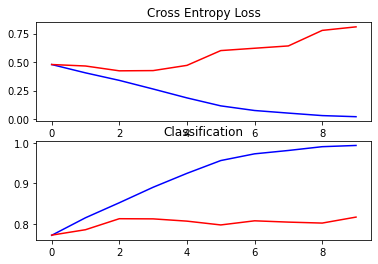

In [92]:
plt.subplot(2,1,1)
plt.title("Cross Entropy Loss")
plt.plot(history.history["loss"],color="blue",label="train")
plt.plot(history.history["val_loss"],color="red",label="test")

plt.subplot(2,1,2)
plt.title("Classification")
plt.plot(history.history["accuracy"],color="blue",label="train")
plt.plot(history.history["val_accuracy"],color="red",label="test")


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator=ImageDataGenerator(rescale=1.0/255.0) #generates batches of tensor in real time data augmentation

#using data augmentation to improve the performance;its only applied to training set
training_datagen=ImageDataGenerator(
    rescale=1.0/255.0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_generator=training_datagen.flow_from_directory(
    directory="/home/riya/Desktop/Imageuploading/Cat Vs Dog Classifier/PetImages/train/",
    target_size=(200,200),
    class_mode="binary",
    batch_size=8
)

#one of the method of ImageDataGenerator to read big numpy array and folders containing images

test_generator=data_generator.flow_from_directory(
    directory="/home/riya/Desktop/Imageuploading/Cat Vs Dog Classifier/PetImages/test/",
    target_size=(200,200),
    class_mode="binary",
    batch_size=8
)

#print(test_generator)
history=model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    verbose=0,
    validation_data=test_generator,
    validation_steps=len(test_generator)   
)
#the history object gets returned by the fit method of models
print("history:",history)
_,acc=model.evaluate(
    test_generator,
    steps=len(test_generator),
    verbose=0
)
print("Accuracy",acc)

Found 19998 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


/home/riya/Desktop/Imageuploading/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:793: UserWarning: Truncated File Read
  warnings.warn(str(msg))


history: <tensorflow.python.keras.callbacks.History object at 0x7f7e5407f070>
Accuracy 0.8360000252723694


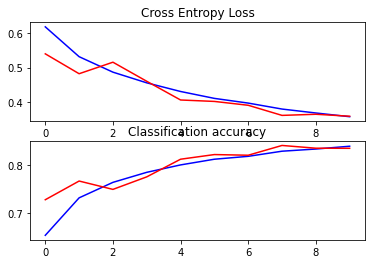

In [6]:
plt.subplot(2,1,1)
plt.title("Cross Entropy Loss")
plt.plot(history.history["loss"],color="blue",label="train")
plt.plot(history.history["val_loss"],color="red",label="test")

plt.subplot(2,1,2)
plt.title("Classification accuracy")
plt.plot(history.history["accuracy"],color="blue",label="train")
plt.plot(history.history["val_accuracy"],color="red",label="test")


In [66]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
#serialize weights to HDF5
model.save_weights("/home/riya/Desktop/Imageuploading/Cat Vs Dog Classifier/model/model.h5")

In [70]:
from tensorflow.keras.models import model_from_json

def init():
    
    #opening, reading and storing the file in a variable
    json_file=open("/home/riya/Desktop/Imageuploading/Cat Vs Dog Classifier/model/model.json","r")
    load_json_model = json_file.read()
    json_file.close()

    #loading the json model and it builds a fresh model from model.json json file 
    loaded_model= model_from_json(load_json_model) #Parses a JSON model configuration string and returns a model instance(uncomplied).

    #loading the weights into the new model
    loaded_model.load_weights("/home/riya/Desktop/Imageuploading/Cat Vs Dog Classifier/model/model.h5")
    print("Loaded weights from new model's disk")

    #newly reconstructed model is uncomplied
    loaded_model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["accuracy"]
             )
    return loaded_model

init()


Loaded weights from new model's disk


In [72]:
from PIL import Image



def predict_image(img_file):
    model=init()

    img=Image.open(img_file) #img_file must be the full path to the sample image
    img=img.resize((200,200))
    img=np.asarray(img)
    img=img.reshape((1,200,200,3)) #input layers of the model created needs a 4 dimension tensor to work with
    #predict the class
    result= model.predict(img)
    print(result[0])

predict_image("/home/riya/Desktop/Imageuploading/Cat Vs Dog Classifier/sample_image.jpg")
    



Loaded weights from new model's disk
[1.]


In [1]:
from sklearn.model_selection import train_test_split
